# STAT207 Final Project - INSERT TITLE HERE


Austin Abraham, Kaiwen Chen, Laila Shaaban, Linh Pham

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [77]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
from sklearn.metrics import confusion_matrix

## 1. Introduction

The motivation in our report is to try to figure out the type of transmission in a vehicle (automatic/manual). The primary research goal of this project is to build a predictive model that will perform the best when predicting the transmission type (automatic/manual) in new datasets. One type of person that would find this information useful would be someone who is interested in buying a car and seeing what type of transmission they would get in their vehicle because some people prefer one over the other. For our case, we would not need a classifier to make positive or negative values more accurate, we would want them to be equally accurate because we would not be sure exactly what each person would be interested in. We could possibly add a slight higher accuracy for automatic transmission due to it being higher popularity according to Smith & Johnson. Brown & White also mention a heavier focus on automatic transmissions. Even though there is more popularity with automatic vehicles we think there should be no bias in the accuracy of the transmission types due to the diverse population that could use this tool.

Citations: \
Smith, J., & Johnson, R. (Year). "Consumer Preferences for Transmission Types in the Automobile Market: A Survey Analysis." Journal of Automotive Research

Brown, A., & White, L. (Year). "Market Trends and Preferences in Automotive Transmission Technologies." International Journal of Automotive Engineering

## 2. Dataset Discussion

We got the csv file from kaggle (link: https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction?resource=download). We downloaded this csv file on April 25th. The rows of this dataset represent an individual cars that have different features. This dataset was collected by looking at car sales from the past. There are some observations that are left out for example, color of vehicle. This could not affect the transmission type so it is fine. We intend to use `Transmission` as our response variable which gives us whether the vehicle is automatic or manual. The explanatory variables are `Fuel_Type`, `Kilometers_Driven`, `Engine`, `Power`, and `Price`. These are all pretty self explanatory. Only ones that might not be are `Fuel_Type` which is petrol(gas) or diesel, `Engine` which is the size of the engine, and `Power` which is horsepower. We chose these variables because we feel that they will be the main focuses when someone is looking to buy a car, and they each seem to be correlated to the transmission type. For example, a lot of lower power engines tend to be manual especially in Europe.

In [78]:
dforiginal=pd.read_csv('cars.csv')
dforiginal.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [79]:
dforiginal.shape[0]

100

## 3. Dataset Cleaning

There are no implicit or explicit missing values in the data set. We dropped 0 rows from missing value detection. Since we did not drop any there are no pros or cons associated with a technique for cleaning missing values. We just checked the dtypes for implicit and then we used dropna for explicit. We did not do any sample size cleaning as our dataset was already of a good size. When looking at outliers, we dropped 1 outlier which was an engine size above 4000 as this outlier would throw our results off. This will help us have a more accurate representation for the majority of vehciles.

In [80]:
dforiginal.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [81]:
dfdrop=dforiginal.dropna()
print('Rows dropped:', dforiginal.shape[0]-dfdrop.shape[0])

Rows dropped: 0


In [82]:
df=dforiginal[['Transmission', 'Fuel_Type', 'Price','Kilometers_Driven', 'Engine', 'Power']]

In [83]:
df['y']=df['Transmission'].replace({'Manual':1, 'Automatic':0})

/var/folders/9x/y56vwwb97zncf3j5cr_1_k980000gn/T/ipykernel_206/2605395424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=df['Transmission'].replace({'Manual':1, 'Automatic':0})


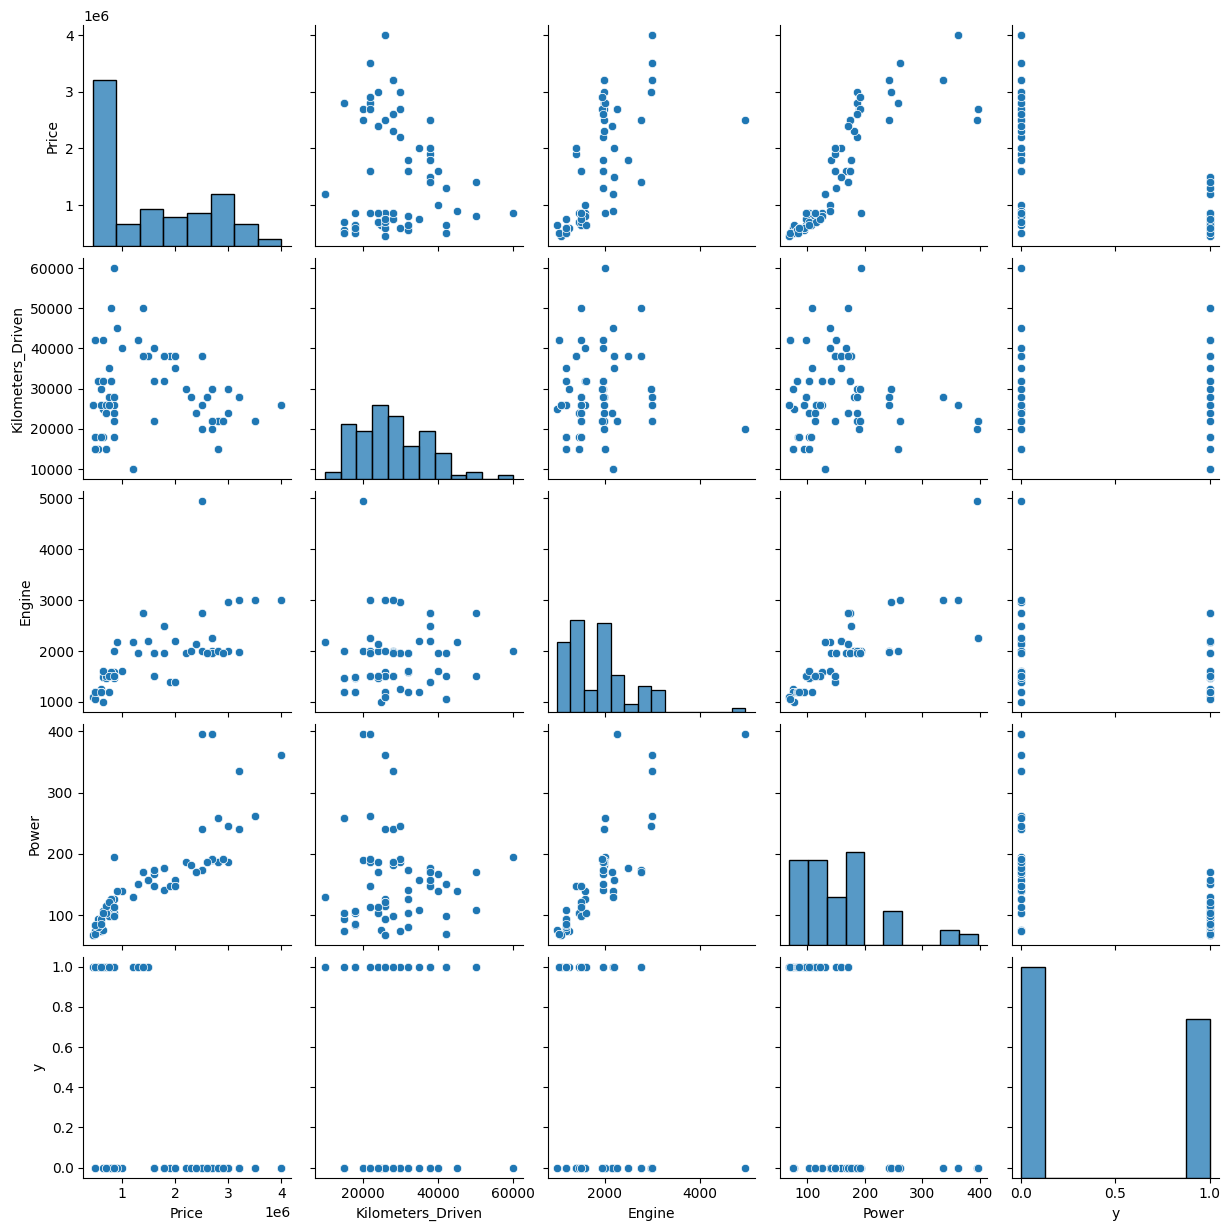

In [84]:
sns.pairplot(df)

In [85]:
rows = df.shape[0]
df=df[df.Engine<=4000]

In [86]:
print('Rows dropped:', rows - df.shape[0])

Rows dropped: 1


## 4. Preliminary Analysis

<Axes: xlabel='Transmission'>

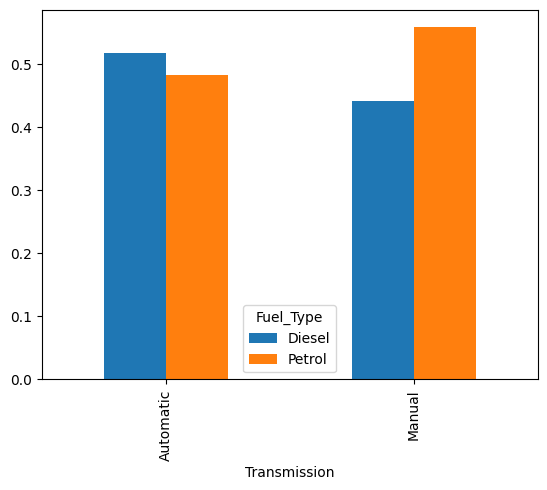

In [87]:
#Transmission and Fuel_Type
temp=pd.crosstab(df['Transmission'], df['Fuel_Type'], normalize='index')
temp.plot.bar()

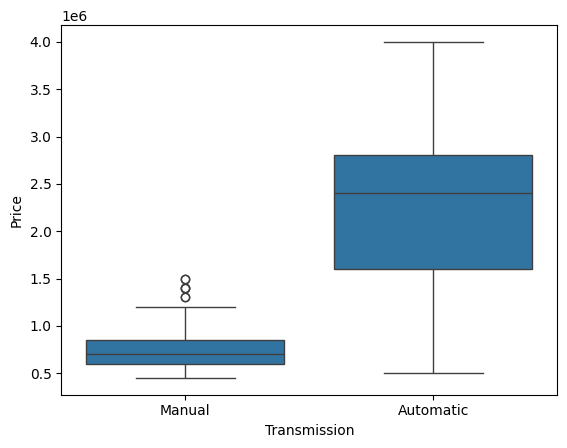

In [88]:
#Tranmission and Price
sns.boxplot(x='Transmission', y='Price', data=df)
plt.show()

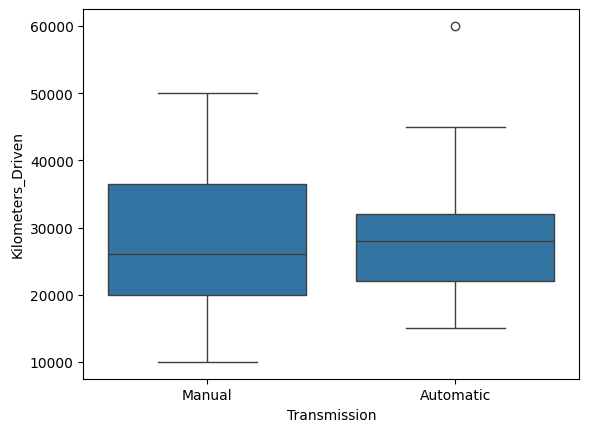

In [89]:
#Transmission and Kilometers_Driven
sns.boxplot(x='Transmission', y='Kilometers_Driven', data=df)
plt.show()

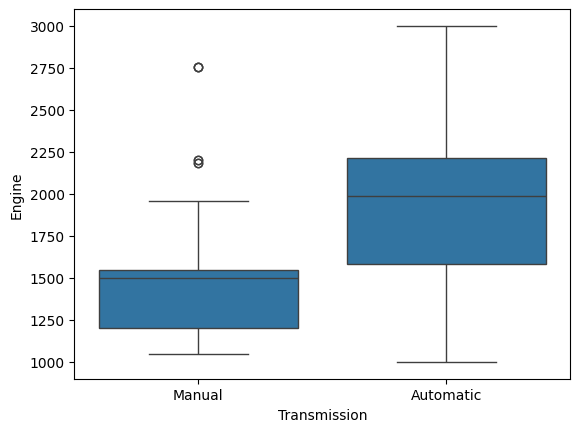

In [90]:
#Tranmission and Engine
sns.boxplot(x='Transmission', y='Engine', data=df)
plt.show()

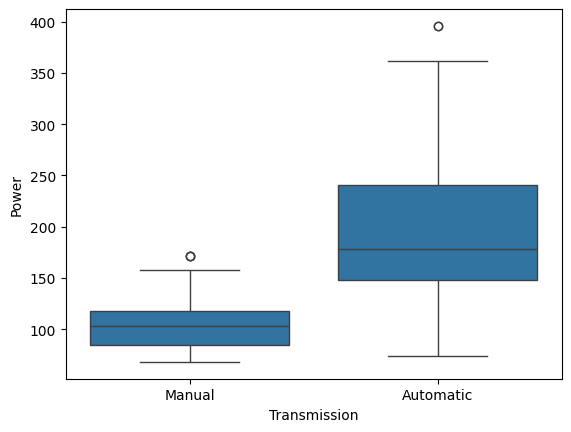

In [91]:
#Transmission and Power
sns.boxplot(x='Transmission', y='Power', data=df)
plt.show()

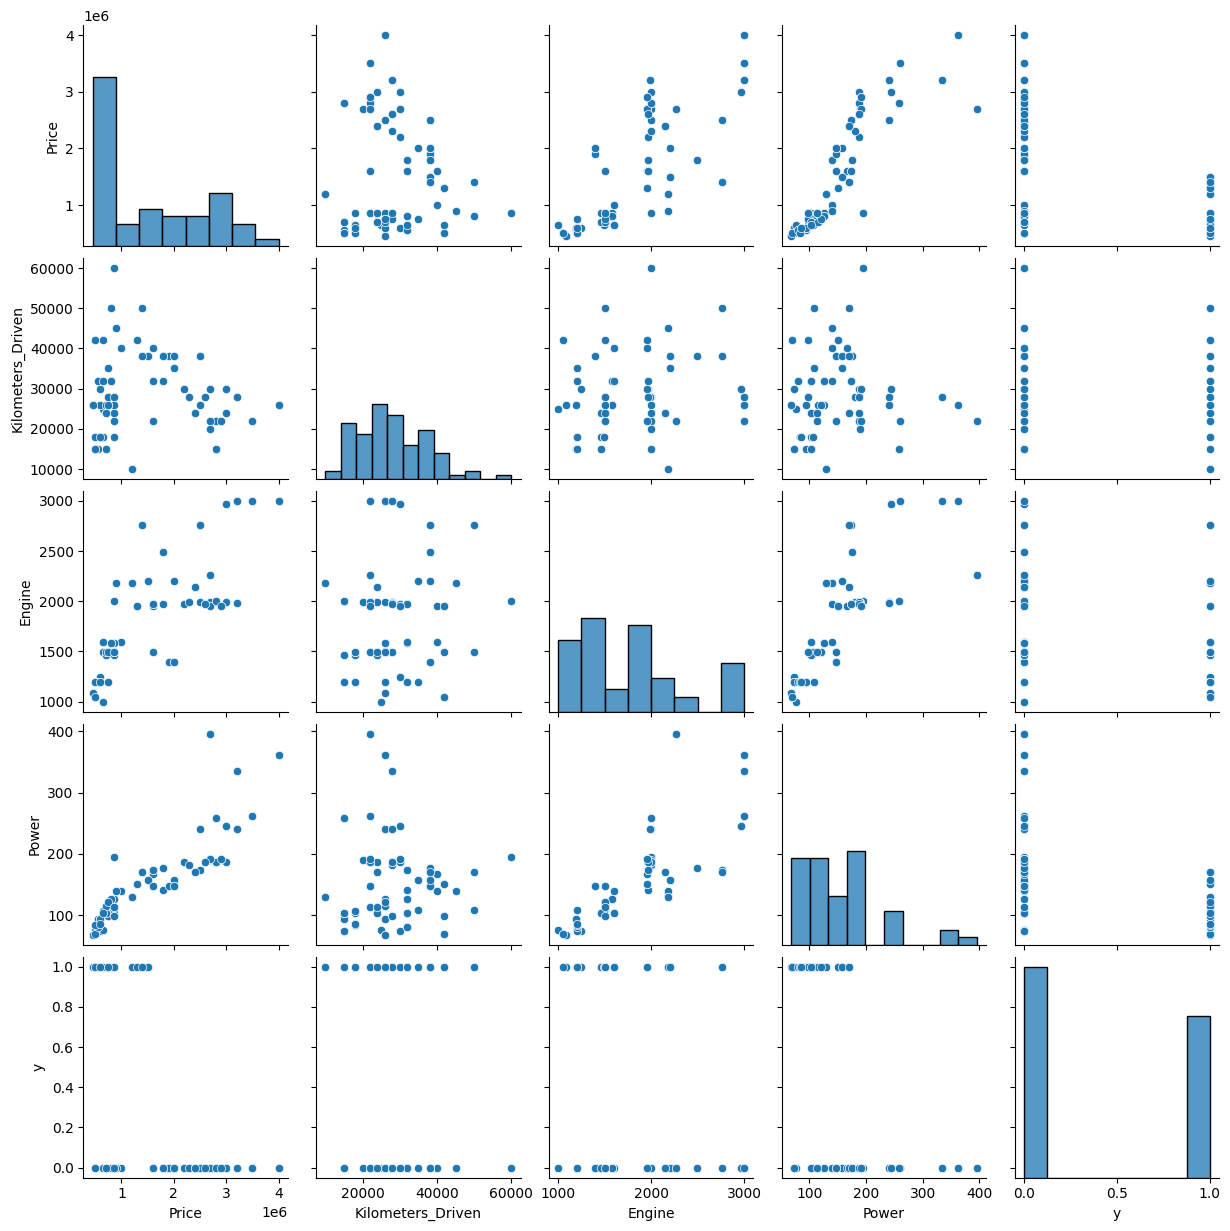

In [92]:
#Relatioship between numerical explanatory variables
sns.pairplot(df)
plt.show()

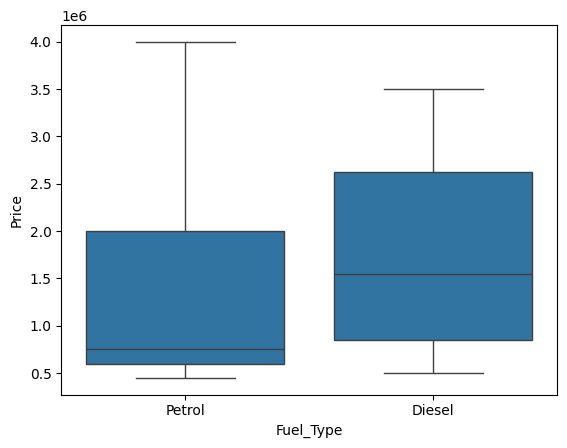

In [93]:
#Fuel_Type and Price
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.show()

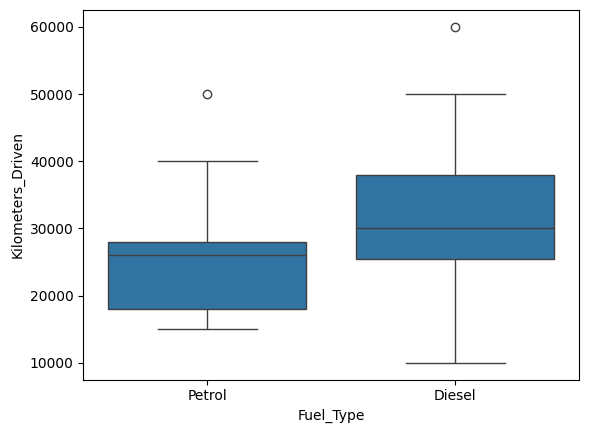

In [94]:
#Fuel_Type and Kilometers_Driven
sns.boxplot(x='Fuel_Type', y='Kilometers_Driven', data=df)
plt.show()

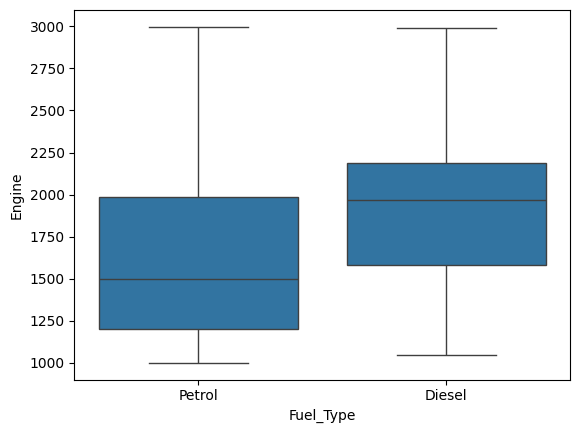

In [95]:
#Fuel_Type and Engine
sns.boxplot(x='Fuel_Type', y='Engine', data=df)
plt.show()

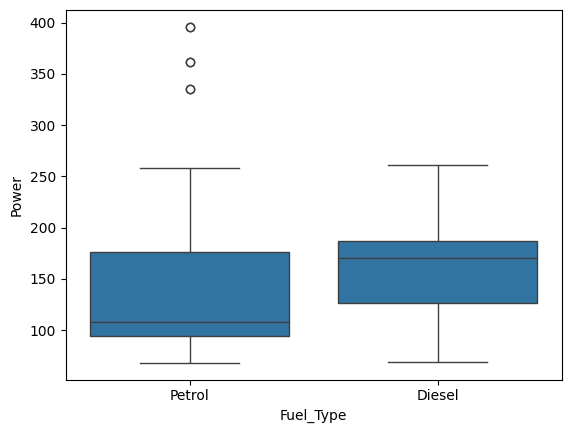

In [96]:
#Fuel_Type and Power
sns.boxplot(x='Fuel_Type', y='Power', data=df)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


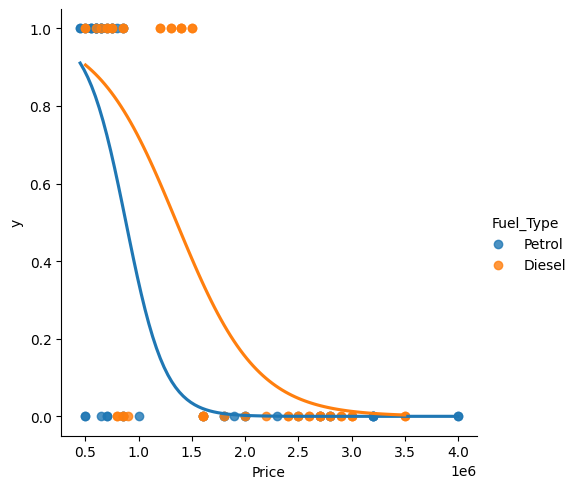

Optimization terminated successfully.
         Current function value: 0.332427
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,4.7482,1.842,2.577,0.010,1.137,8.359
Price,-5.393e-06,2.53e-06,-2.129,0.033,-1.04e-05,-4.28e-07


Optimization terminated successfully.
         Current function value: 0.379456
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.5825,1.077,3.326,0.001,1.471,5.693
Price,-2.642e-06,7.54e-07,-3.502,0.000,-4.12e-06,-1.16e-06


In [97]:
#Interaction effects for Fuel_Type and Price pair
sns.lmplot(x='Price', y='y', hue='Fuel_Type', data=df, logistic=True, ci=False)
plt.show()
simple_log_mod1=smf.logit('y~Fuel_Type+Price', data=df[df['Fuel_Type']=='Petrol']).fit()
display(simple_log_mod1.summary().tables[1])
simple_log_mod1=smf.logit('y~Fuel_Type+Price', data=df[df['Fuel_Type']=='Diesel']).fit()
display(simple_log_mod1.summary().tables[1])

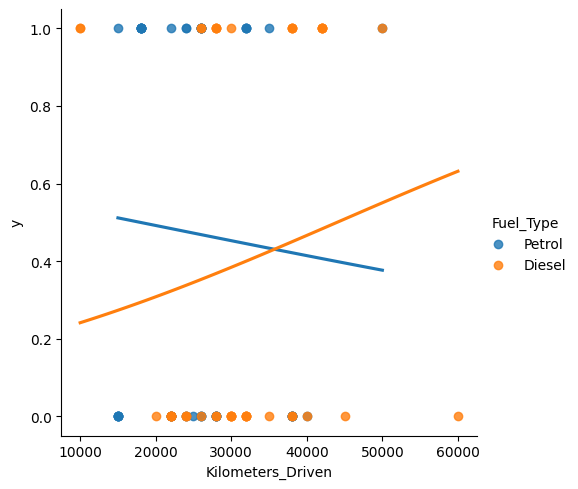

Optimization terminated successfully.
         Current function value: 0.689518
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.2814,0.952,0.296,0.768,-1.584,2.147
Kilometers_Driven,-1.572e-05,3.59e-05,-0.438,0.661,-8.6e-05,5.46e-05


Optimization terminated successfully.
         Current function value: 0.659802
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.4846,1.079,-1.376,0.169,-3.600,0.631
Kilometers_Driven,3.373e-05,3.27e-05,1.031,0.302,-3.04e-05,9.78e-05


In [98]:
#Interaction effects for Fuel_Type and Kilometers_Driven pair
sns.lmplot(x='Kilometers_Driven', y='y', hue='Fuel_Type', data=df, logistic=True, ci=False)
plt.show()
simple_log_mod2=smf.logit('y~Fuel_Type+Kilometers_Driven', data=df[df['Fuel_Type']=='Petrol']).fit()
display(simple_log_mod2.summary().tables[1])
simple_log_mod2=smf.logit('y~Fuel_Type+Kilometers_Driven', data=df[df['Fuel_Type']=='Diesel']).fit()
display(simple_log_mod2.summary().tables[1])

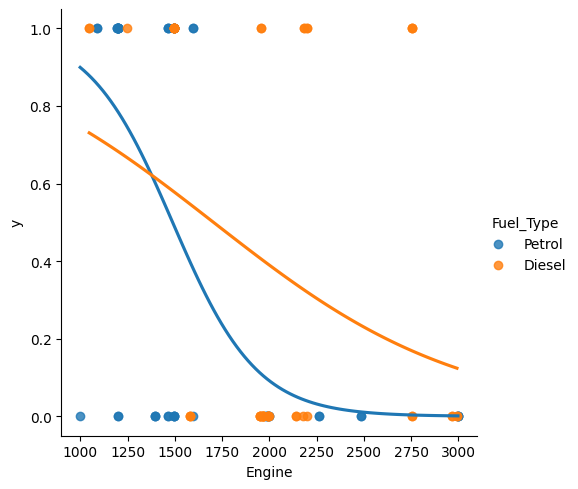

Optimization terminated successfully.
         Current function value: 0.482214
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,6.6682,2.199,3.032,0.002,2.358,10.979
Engine,-0.0045,0.002,-2.960,0.003,-0.007,-0.002


Optimization terminated successfully.
         Current function value: 0.616681
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.5868,1.446,1.789,0.074,-0.247,5.420
Engine,-0.0015,0.001,-2.091,0.037,-0.003,-9.48e-05


In [99]:
#Interaction effects for Fuel_Type and Engine pair
sns.lmplot(x='Engine', y='y', hue='Fuel_Type', data=df, logistic=True, ci=False)
plt.show()
simple_log_mod3=smf.logit('y~Fuel_Type+Engine', data=df[df['Fuel_Type']=='Petrol']).fit()
display(simple_log_mod3.summary().tables[1])
simple_log_mod3=smf.logit('y~Fuel_Type+Engine', data=df[df['Fuel_Type']=='Diesel']).fit()
display(simple_log_mod3.summary().tables[1])

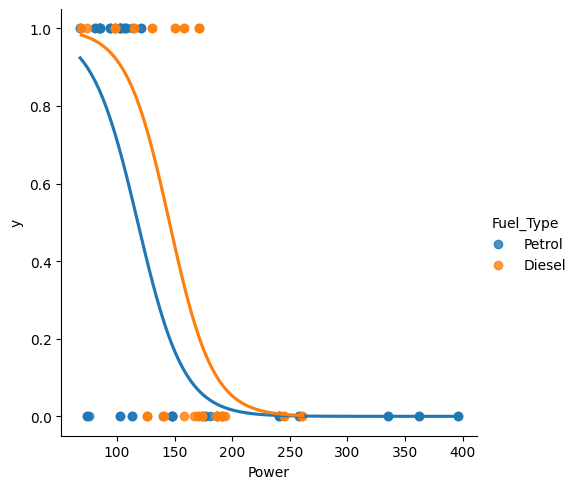

Optimization terminated successfully.
         Current function value: 0.395700
         Iterations 8


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,5.8922,1.869,3.153,0.002,2.230,9.555
Power,-0.0499,0.017,-2.966,0.003,-0.083,-0.017


Optimization terminated successfully.
         Current function value: 0.393462
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,7.7042,2.315,3.328,0.001,3.167,12.242
Power,-0.0529,0.015,-3.566,0.000,-0.082,-0.024


In [100]:
#Interaction effects for Fuel_Type and Power pair
sns.lmplot(x='Power', y='y', hue='Fuel_Type', data=df, logistic=True, ci=False)
plt.show()
simple_log_mod4=smf.logit('y~Fuel_Type+Power', data=df[df['Fuel_Type']=='Petrol']).fit()
display(simple_log_mod4.summary().tables[1])
simple_log_mod4=smf.logit('y~Fuel_Type+Power', data=df[df['Fuel_Type']=='Diesel']).fit()
display(simple_log_mod4.summary().tables[1])

## 5. Model Data Preprocessing

We started by converting our response variable `Transmission` to `Transmission_Manual` which is our 0/1 variable to show if the transmission is manual or not. Then we created features matrix `X` and target array `y` by selecting columns accordingly. Lastly, we scaled numerical variables using StandardScaler(). We did not need to translate categorical variables as they already were.

In [101]:
df = pd.get_dummies(df, columns=['Transmission'], drop_first=True)
df.head()

,Fuel_Type,Price,Kilometers_Driven,Engine,Power,y,Transmission_Manual
0,Petrol,800000,50000,1498,108,1,True
1,Petrol,1000000,40000,1597,140,0,False
3,Diesel,600000,30000,1248,74,1,True
4,Diesel,850000,60000,1999,194,0,False
5,Petrol,750000,35000,1198,108,1,True


In [102]:
X = df.drop(columns=['Transmission_Manual'])
X.head()

,Fuel_Type,Price,Kilometers_Driven,Engine,Power,y
0,Petrol,800000,50000,1498,108,1
1,Petrol,1000000,40000,1597,140,0
3,Diesel,600000,30000,1248,74,1
4,Diesel,850000,60000,1999,194,0
5,Petrol,750000,35000,1198,108,1


In [103]:
y = df['Transmission_Manual']
y.head()

0     True
1    False
3     True
4    False
5     True
Name: Transmission_Manual, dtype: bool

In [104]:
numerical_vars = ['Price', 'Kilometers_Driven', 'Engine', 'Power']
scaler = StandardScaler()
df[numerical_vars] = scaler.fit_transform(df[numerical_vars])
df.head()

,Fuel_Type,Price,Kilometers_Driven,Engine,Power,y,Transmission_Manual
0,Petrol,-0.767809,2.396226,-0.594355,-0.652553,1,True
1,Petrol,-0.566981,1.295408,-0.413839,-0.215124,0,False
3,Diesel,-0.968636,0.194589,-1.050206,-1.117320,1,True
4,Diesel,-0.717602,3.497044,0.319169,0.523036,0,False
5,Petrol,-0.818015,0.744998,-1.141376,-0.652553,1,True


## 6. Feature Selection with k-Fold Cross-Validation

In [105]:
from sklearn.linear_model import LogisticRegression
cross_val = KFold(n_splits=5, shuffle=True, random_state=42)
df1 = pd.get_dummies(df, columns=['Fuel_Type'],drop_first = True, dtype=int)
df1 = df1.drop(['y'], axis = 1)
df1

,Price,Kilometers_Driven,Engine,Power,Transmission_Manual,Fuel_Type_Petrol
0,-0.767809,2.396226,-0.594355,-0.652553,True,1
1,-0.566981,1.295408,-0.413839,-0.215124,False,1
3,-0.968636,0.194589,-1.050206,-1.117320,True,0
4,-0.717602,3.497044,0.319169,0.523036,False,0
5,-0.818015,0.744998,-1.141376,-0.652553,True,1
...,...,...,...,...,...,...
95,1.340876,-0.686066,0.229822,0.482027,False,0
96,-0.165327,1.075244,1.697661,0.208635,True,0
97,-0.818015,-0.245738,-0.596179,-0.474847,True,1
98,-0.717602,-0.465902,-0.596179,-0.584204,False,1


In [106]:
x_m = df1.drop(['Transmission_Manual'], axis = 1)
y_m = df1['Transmission_Manual']
model = LogisticRegression()
y_m.head()

0     True
1    False
3     True
4    False
5     True
Name: Transmission_Manual, dtype: bool

In [107]:
test_fold_auc1 = cross_val_score(model, x_m, y_m, cv=cross_val, scoring='roc_auc')
print('mean test fold auc: ', test_fold_auc1.mean())

mean test fold auc:  0.8935298035298034


In [108]:
x_m1 = x_m.drop(['Price'], axis = 1)

In [109]:
test_fold_auc2 = cross_val_score(model, x_m1, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.9003395215895216


In [110]:
x_m2 = x_m.drop(['Kilometers_Driven'], axis = 1)

In [111]:
test_fold_auc2 = cross_val_score(model, x_m2, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.9064733877233877


In [112]:
x_m3 = x_m.drop(['Engine'], axis = 1)

In [113]:
test_fold_auc2 = cross_val_score(model, x_m3, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.9042898767898768


In [114]:
x_m4 = x_m.drop(['Power'], axis = 1)

In [115]:
test_fold_auc2 = cross_val_score(model, x_m4, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.8848530636030635


In [116]:
x_m5 = x_m.drop(['Fuel_Type_Petrol'], axis = 1)

In [117]:
test_fold_auc2 = cross_val_score(model, x_m5, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.9022065434565434


From the first round of choosing, we can see when we drop the Price, we will get the highest AUC. Thus, we choose to drop the Price

In [118]:
x_m6 = x_m1.drop(['Kilometers_Driven'], axis = 1)

In [119]:
test_fold_auc2 = cross_val_score(model, x_m6, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.9058441558441558


In [120]:
x_m7 = x_m1.drop(['Engine'], axis = 1)

In [121]:
test_fold_auc2 = cross_val_score(model, x_m7, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.9027906815406815


In [122]:
x_m8 = x_m1.drop(['Power'], axis = 1)

In [123]:
test_fold_auc2 = cross_val_score(model, x_m8, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.7677750027750029


In [124]:
x_m9 = x_m1.drop(['Fuel_Type_Petrol'], axis = 1)

In [125]:
test_fold_auc2 = cross_val_score(model, x_m9, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.9048740148740148


From the second round of choosing, we can see when we drop the Price and Fuel_Type_Petrol_True, we will get the highest AUC. Thus, we choose to drop the Price and Fuel_Type_Petrol_True

In [126]:
x_m10 = x_m9.drop(['Kilometers_Driven'], axis = 1)

In [127]:
test_fold_auc2 = cross_val_score(model, x_m10, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.9060730935730936


In [128]:
x_m11 = x_m9.drop(['Engine'], axis = 1)

In [129]:
test_fold_auc2 = cross_val_score(model, x_m11, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.8939506327006328


In [130]:
x_m12 = x_m9.drop(['Power'], axis = 1)

In [131]:
test_fold_auc2 = cross_val_score(model, x_m12, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.756963591963592


From the third round of choosing, we can see when we drop the Price, Fuel_Type_Petrol_True and Kilometers_Driven, we will get the highest AUC. Thus, we choose to drop the Price, Fuel_Type_Petrol_True and Kilometers_Driven

In [132]:
x_m13 = x_m10.drop(['Engine'], axis = 1)

In [133]:
test_fold_auc2 = cross_val_score(model, x_m13, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.8804881229881228


In [134]:
x_m14 = x_m10.drop(['Power'], axis = 1)

In [135]:
test_fold_auc2 = cross_val_score(model, x_m14, y_m, cv = cross_val, scoring = 'roc_auc')
print('mean test fold auc: ', test_fold_auc2.mean())

mean test fold auc:  0.7717123154623154


Finally, we have checked all of the models as above, we find when we drop the Price, Fuel_Type_Petrol_True and Kilometers_Driven, we will get the highest AUC which is 0.903098. Thus, we choose to the model which have dropped the Price, Fuel_Type_Petrol_True and Kilometers_Driven for predictor.

## 7. Best Model Discussion

In [152]:
df_train, df_test = train_test_split(df1, test_size = 0.2, random_state=207)

In [154]:
X_train = df_train[['Engine', 'Power']]
y_train = df_train['Transmission_Manual']

In [138]:
best_model = model.fit(X_train, y_train)
print(best_model.coef_.T)
print(best_model.intercept_)

[[ 0.51830433]
 [-2.47519172]]
[-0.68012347]


The equation: Probability of Transmission_Manual = 1 / 1 + e^-(-0.68012347 + 0.51830433*Engine -2.47519172*Power)

In [139]:
X_train.corr()

,Engine,Power
Engine,1.000000,0.793392
Power,0.793392,1.000000


Multicollinearity: This model has an issue with multicolinearlity, because the correlation between engine and power is higher than 0.7

Slope Interpretations: we are able to interpret the magnitudes of the slopes as indicating how important the corresponding 
explanatory (or indicator) variable is when it comes to predictingourr response variable in a logistic
regression mod because we have already scaled the value of every predictors. Thus, the magnitude of each explanatory variables is similar, we can use their coeffient to recognize their importance.
The variable Power is more important than Engine, because it has higher absolute value of coeffient.l?

Overfitting Explanatory Variables: 1.Yes, there are overfitting predictors. As we can see in the process of backward elimination, we know the Price, Fuel_Type_Petrol_True and Kilometers_Driven are overfitting.
2.The Price has weakest relationship with transmission, because it was dropped by backward elimination at first. Likewise, the Fuel type has second weakest relationship with response variable, then the Kilometers_Drivenis has third weakest relationship with response variable.
3.Yes, they have. From the boxplot and pairplot in No.4 Preliminary Analysis, we can see the fuel type and strong association with engine and power, because the IQR is much different each boxplots in the graph. And power has strong association with price, because their points fit the linear regression as we can see in the pairplot.

In [140]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [141]:
df_test_real = df_test[['Engine', 'Power']]
df_test_real['pre_pro'] = best_model.predict(df_test_real)

/var/folders/9x/y56vwwb97zncf3j5cr_1_k980000gn/T/ipykernel_206/3469756877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_real['pre_pro'] = best_model.predict(df_test_real)


In [142]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='Roc curve (area = '+ str(round(auc,3))+')')
    plt.plot([0,1], [0,1], color='navy',lw=lw,linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc curve')
    plt.legend(loc='lower right')
    plt.show()

In [143]:
auc = roc_auc_score(y_true=df_test['Transmission_Manual'],
                    y_score=df_test_real['pre_pro'])
auc

0.8901098901098902

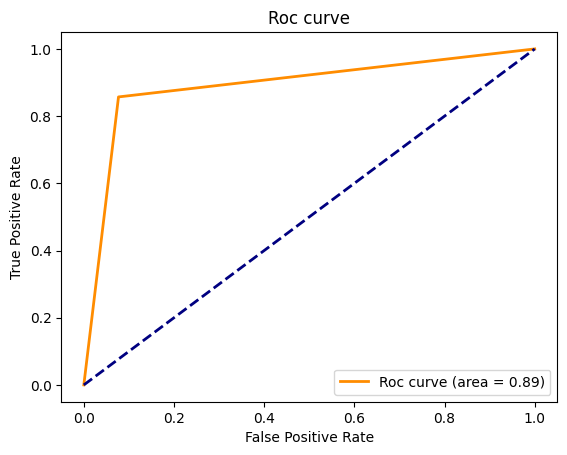

In [144]:
fprs, tprs, thresholds = roc_curve(y_true=df_test['Transmission_Manual'],
                                   y_score=df_test_real['pre_pro'])
plot_roc(fprs, tprs, auc)

The ability of the model to classify the data is very good, because the AUC is much higher than 0.5 and close to 1. And the Roc curve is close to the ideal curve.

In [145]:
from sklearn.metrics import confusion_matrix
def fpr_tpr_thresh(y, pre_prob, thresh):
    yhat = 1*(pre_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'fpr':[fpr],
                         'tpr':[tpr]})

In [146]:
for thresh in np.arange(0, 1.01, 0.01):
    print(fpr_tpr_thresh(df_test['Transmission_Manual'],
                         df_test_real['pre_pro'],
                         thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold       fpr       tpr
0       0.01  0.076923  0.857143
   threshold       fpr       tpr
0       0.02  0.076923  0.857143
   threshold       fpr       tpr
0       0.03  0.076923  0.857143
   threshold       fpr       tpr
0       0.04  0.076923  0.857143
   threshold       fpr       tpr
0       0.05  0.076923  0.857143
   threshold       fpr       tpr
0       0.06  0.076923  0.857143
   threshold       fpr       tpr
0       0.07  0.076923  0.857143
   threshold       fpr       tpr
0       0.08  0.076923  0.857143
   threshold       fpr       tpr
0       0.09  0.076923  0.857143
   threshold       fpr       tpr
0        0.1  0.076923  0.857143
   threshold       fpr       tpr
0       0.11  0.076923  0.857143
   threshold       fpr       tpr
0       0.12  0.076923  0.857143
   threshold       fpr       tpr
0       0.13  0.076923  0.857143
   threshold       fpr       tpr
0       0.14  0.076923  0.857143
   threshold       fpr       t

In [147]:
phat_test = best_model.predict(df_test_real.drop(['pre_pro'], axis = 1))
df_test['predict_tran'] = phat_test
df_test['Transmission_Manual_hat'] = 1*(df_test['predict_tran']>=0.9)
df_test[['Transmission_Manual','Transmission_Manual_hat']]

,Transmission_Manual,Transmission_Manual_hat
28,False,0
76,False,0
48,False,0
49,False,0
6,False,1
67,False,0
15,True,1
13,False,0
65,False,0
37,False,0


In [148]:
confusion_matrix(y_true = df_test['Transmission_Manual'], y_pred = df_test['Transmission_Manual_hat'])


array([[12,  1],
       [ 1,  6]])

In [149]:
FPR = 1 / (12+1)
FPR

0.07692307692307693

In [150]:
TPR = 6 / (1 + 6)
TPR

0.8571428571428571

From the ROC curve and out research goal, we finally decide to choose 0.9 as out threshold. And the FPR is 0.077, the TPR is 0.86. Thus, it means that the percent of observation that are actually a negative that are incorrectly predicted to be a positive by our model is 0.077. Then, the percent of observation that are actually a positive that are correctly predicted to be a positive by our model is 0.86.

## 8. Additional Analysis/Insight

## 9. Conclusion

## References